# Mean hourly earnings by sex, economic activity and length of service with the enterprise

In [1]:
# Source: https://data.europa.eu/euodp/en/data/dataset/xHjN3XYukUGCHuHjuM7fcQ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
data=pd.read_csv('earn_ses18_17.csv')

In [4]:
data.shape

(10776, 38)

In [5]:
data.head()

,indic_se,l_serv,nace_r2,sex,sizeclas,unit,time\geo,BE,BG,CZ,...,SI,SK,FI,SE,UK,IS,NO,CH,AL,RS
0,ERN,TOTAL,B,F,GE10,EUR,2018,18.76,4.18,6.93,...,11.46,5.45,20.54,23.22,28.33,:,47.82,29.98,2.45,: c
1,ERN,TOTAL,B,F,GE10,NAC,2018,18.76,8.17,177.61,...,11.46,5.45,20.54,238.24,25.06,:,458.93,34.63,313.17,: c
2,ERN,TOTAL,B,F,GE10,PPS,2018,16.34,8.03,9.43,...,13.15,6.83,16.31,18.79,23.58,:,31.66,19.22,4.54,: c
3,ERN,TOTAL,B,F,TOTAL,EUR,2018,:,4.15,6.93,...,11.34,5.47,:,:,29.52,:,47.62,30.51,:,:
4,ERN,TOTAL,B,F,TOTAL,NAC,2018,:,8.12,177.61,...,11.34,5.47,:,:,26.12,:,457.04,35.24,:,:


In [6]:
data.columns

Index(['indic_se', 'l_serv', 'nace_r2', 'sex', 'sizeclas', 'unit', 'time\geo',
       'BE ', 'BG ', 'CZ ', 'DK ', 'DE ', 'EE ', 'IE ', 'ES ', 'FR ', 'IT ',
       'CY ', 'LV ', 'LT ', 'LU ', 'HU ', 'MT ', 'NL ', 'AT ', 'PL ', 'PT ',
       'RO ', 'SI ', 'SK ', 'FI ', 'SE ', 'UK ', 'IS ', 'NO ', 'CH ', 'AL ',
       'RS '],
      dtype='object')

In [7]:
data.describe(include = 'all')

,indic_se,l_serv,nace_r2,sex,sizeclas,unit,time\geo,BE,BG,CZ,...,SI,SK,FI,SE,UK,IS,NO,CH,AL,RS
count,10776,10776,10776,10776,10776,10776,10776.0,10776,10776,10776,...,10776,10776,10776,10776,10776,10776,10776,10776,10776,10776
unique,3,9,29,3,2,4,NaN,1787,2116,4566,...,2005,1820,2318,3382,3031,2831,5869,4333,1445,2522
top,ERN,Y1-5,I,T,GE10,PPS,NaN,:,:,:,...,:,:,:,:,:,:,:,:,:,:
freq,4656,1218,378,3622,5449,3082,NaN,6708,1432,1106,...,1277,1116,5908,5935,1066,6937,2250,1174,7685,5980
mean,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   indic_se  10776 non-null  object
 1   l_serv    10776 non-null  object
 2   nace_r2   10776 non-null  object
 3   sex       10776 non-null  object
 4   sizeclas  10776 non-null  object
 5   unit      10776 non-null  object
 6   time\geo  10776 non-null  int64 
 7   BE        10776 non-null  object
 8   BG        10776 non-null  object
 9   CZ        10776 non-null  object
 10  DK        10776 non-null  object
 11  DE        10776 non-null  object
 12  EE        10776 non-null  object
 13  IE        10776 non-null  object
 14  ES        10776 non-null  object
 15  FR        10776 non-null  object
 16  IT        10776 non-null  object
 17  CY        10776 non-null  object
 18  LV        10776 non-null  object
 19  LT        10776 non-null  object
 20  LU        10776 non-null  object
 21  HU        10

In [46]:
data.isnull().sum()

indic_se    0
l_serv      0
nace_r2     0
sex         0
sizeclas    0
unit        0
time\geo    0
BE          0
BG          0
CZ          0
DK          0
DE          0
EE          0
IE          0
ES          0
FR          0
IT          0
CY          0
LV          0
LT          0
LU          0
HU          0
MT          0
NL          0
AT          0
PL          0
PT          0
RO          0
SI          0
SK          0
FI          0
SE          0
UK          0
IS          0
NO          0
CH          0
AL          0
RS          0
dtype: int64

In [10]:
data.loc[~data['BE '].astype(str).str.isdecimal(), 'BE '].tolist()

['18.76',
 '18.76',
 '16.34',
 ': ',
 ': ',
 ': ',
 '18.19',
 '18.19',
 '15.85',
 ': ',
 ': ',
 ': ',
 '18.67',
 '18.67',
 '16.27',
 ': ',
 ': ',
 ': ',
 '19.97',
 '19.97',
 '17.39',
 ': ',
 ': ',
 ': ',
 '22.37',
 '22.37',
 '19.49',
 ': ',
 ': ',
 ': ',
 '21.57',
 '21.57',
 '18.79',
 ': ',
 ': ',
 ': ',
 '18.86',
 '18.86',
 '16.43',
 ': ',
 ': ',
 ': ',
 '21.26',
 '21.26',
 '18.53',
 ': ',
 ': ',
 ': ',
 '20.4',
 '20.4',
 '17.77',
 ': ',
 ': ',
 ': ',
 '18.58',
 '18.58',
 '16.18',
 ': ',
 ': ',
 ': ',
 '20.65',
 '20.65',
 '17.99',
 ': ',
 ': ',
 ': ',
 '19.71',
 '19.71',
 '17.17',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 ': ',
 '19.58',
 '19.58',
 '17.06',
 ': ',
 ': ',
 ': ',
 '20.78',
 '20.78',
 '18.1',
 ': ',
 ': ',
 ': ',
 '20.19',
 '20.19',
 '17.59',
 ': ',
 ': ',
 ': ',
 '19.62',
 '19.62',
 '17.09',
 ': ',
 ': ',
 ': ',
 '21.97',
 '21.97',
 '19.14',
 ': ',
 ': ',
 ': ',
 '21.19',


In [11]:
data = data.replace(': ',np.NaN)
data = data.replace(': c',np.NaN)
for x in data.columns[7:]:
    data[x] = data[x].astype(float)
data = data.fillna(data.mean())

<AxesSubplot:>

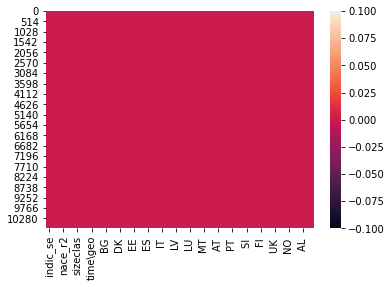

In [12]:
sns.heatmap(data.isnull())

In [13]:
# 1. Which are the different countries from where data has been collected

In [14]:
countries = data.columns[7:]
print("Number of countries is :",len(countries),
      "\n Name: ", countries)

Number of countries is : 31 
 Name:  Index(['BE ', 'BG ', 'CZ ', 'DK ', 'DE ', 'EE ', 'IE ', 'ES ', 'FR ', 'IT ',
       'CY ', 'LV ', 'LT ', 'LU ', 'HU ', 'MT ', 'NL ', 'AT ', 'PL ', 'PT ',
       'RO ', 'SI ', 'SK ', 'FI ', 'SE ', 'UK ', 'IS ', 'NO ', 'CH ', 'AL ',
       'RS '],
      dtype='object')


In [15]:
df = pd.DataFrame({'Country': countries})

<AxesSubplot:xlabel='Country'>

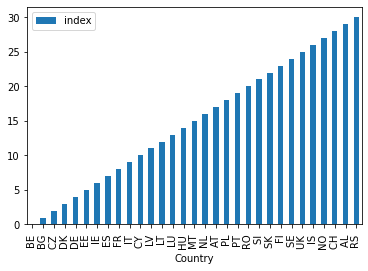

In [16]:
df.reset_index().plot.bar(x = "Country", y = "index")

In [17]:
# 2. What is the male to female to transgender (no. of entries)

In [18]:
data_f = data.loc[data['sex']=='F']
f = data_f[[ 'BE ', 'BG ', 'CZ ', 'DK ', 'DE ', 'EE ', 'IE ', 'ES ', 'FR ', 'IT ',
       'CY ', 'LV ', 'LT ', 'LU ', 'HU ', 'MT ', 'NL ', 'AT ', 'PL ', 'PT ',
       'RO ', 'SI ', 'SK ', 'FI ', 'SE ', 'UK ', 'IS ', 'NO ', 'CH ', 'AL ',
       'RS ']].sum(axis = 0)

data_m = data.loc[data['sex']=='M']
m = data_m[[ 'BE ', 'BG ', 'CZ ', 'DK ', 'DE ', 'EE ', 'IE ', 'ES ', 'FR ', 'IT ',
       'CY ', 'LV ', 'LT ', 'LU ', 'HU ', 'MT ', 'NL ', 'AT ', 'PL ', 'PT ',
       'RO ', 'SI ', 'SK ', 'FI ', 'SE ', 'UK ', 'IS ', 'NO ', 'CH ', 'AL ',
       'RS ']].sum(axis = 0)

data_t = data.loc[data['sex']=='T']
t = data_t[[ 'BE ', 'BG ', 'CZ ', 'DK ', 'DE ', 'EE ', 'IE ', 'ES ', 'FR ', 'IT ',
       'CY ', 'LV ', 'LT ', 'LU ', 'HU ', 'MT ', 'NL ', 'AT ', 'PL ', 'PT ',
       'RO ', 'SI ', 'SK ', 'FI ', 'SE ', 'UK ', 'IS ', 'NO ', 'CH ', 'AL ',
       'RS ']].sum(axis = 0)

In [19]:
ratio_df = pd.DataFrame()
ratio_df["Female"] = f
ratio_df["Male"] = m
ratio_df["Tr"] = t

In [20]:
ratio_df

,Female,Male,Tr
BE,1.373932e+05,1.371208e+05,1.390924e+05
BG,9.075975e+04,9.322660e+04,9.472309e+04
CZ,2.825609e+05,3.191408e+05,3.061772e+05
DK,4.343217e+05,4.568022e+05,4.532588e+05
DE,1.118471e+05,1.239074e+05,1.204264e+05
EE,9.758899e+04,1.038014e+05,1.025275e+05
IE,1.640755e+05,1.707073e+05,1.694492e+05
ES,1.131806e+05,1.208625e+05,1.189052e+05
FR,1.270261e+05,1.295251e+05,1.299083e+05
IT,1.062603e+05,1.078432e+05,1.085175e+05


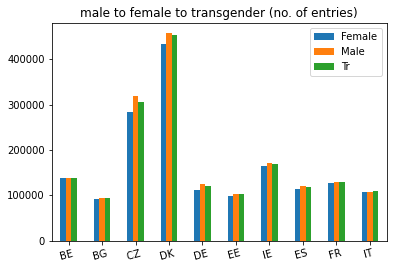

In [21]:
ratio_df.head(10).plot.bar(rot=15, title="male to female to transgender (no. of entries)");

plt.show(block=True);

In [22]:
# 3. Max, mean and median income in 10 country for all different genders

In [23]:
f_m = ratio_df.Female.mean()
m_m = ratio_df.Male.mean()
t_m = ratio_df.Tr.mean()

f_mm = ratio_df.Female.median()
m_mm = ratio_df.Male.median()
t_mm = ratio_df.Tr.median()

maximum = ratio_df.max()

In [24]:
mmm = maximum.to_frame()
mmm["Mean"] = [f_m,m_m,t_m]
mmm["Median"] = [f_mm,m_mm,t_mm]
mmm.rename(columns= {0: "Maximum"}, inplace = True)

In [25]:
mmm

,Maximum,Mean,Median
Female,4.329095e+06,389121.981993,121202.965390
Male,4.500269e+06,411417.097203,129525.142725
Tr,4.466759e+06,406214.852607,129412.754314


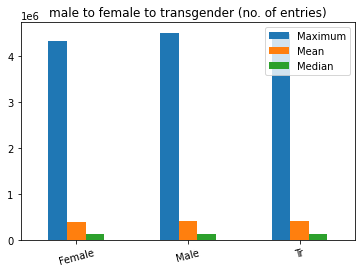

In [26]:
mmm.plot.bar(rot=15, title="male to female to transgender (no. of entries)");

plt.show(block=True);

In [27]:
# 4. Average income in top 10 countries irrespective of the gender

In [28]:
ratio_df['Average'] = ratio_df.mean(axis = 1)
ratio_df = ratio_df.sort_values(by = ['Average'], ascending = False)

In [29]:
ratio_df

,Female,Male,Tr,Average
IS,4.329095e+06,4.500269e+06,4.466759e+06,4.432041e+06
HU,2.487047e+06,2.743158e+06,2.656938e+06,2.629047e+06
RS,5.217143e+05,5.305375e+05,5.322400e+05,5.281639e+05
NO,4.820792e+05,5.383405e+05,5.191747e+05,5.131981e+05
DK,4.343217e+05,4.568022e+05,4.532588e+05,4.481276e+05
AL,4.226860e+05,4.330099e+05,4.363448e+05,4.306802e+05
SE,3.821858e+05,3.949005e+05,3.955479e+05,3.908781e+05
CZ,2.825609e+05,3.191408e+05,3.061772e+05,3.026263e+05
CH,1.655703e+05,1.831412e+05,1.778523e+05,1.755213e+05
IE,1.640755e+05,1.707073e+05,1.694492e+05,1.680774e+05


<AxesSubplot:xlabel='index'>

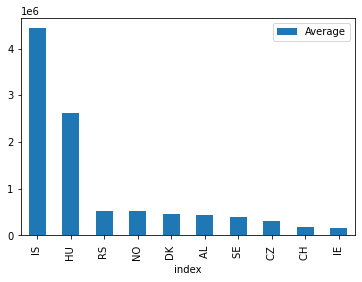

In [30]:
ratio_df.head(10).reset_index().plot.bar(y = "Average", x = "index")

In [31]:
# 5. What is the different types of sizeclas and their counts

In [32]:
unique_sizeclas = data.groupby('sizeclas')['sizeclas'].count()

In [33]:
unique_sizeclas

sizeclas
GE10     5449
TOTAL    5327
Name: sizeclas, dtype: int64

<AxesSubplot:ylabel='sizeclas'>

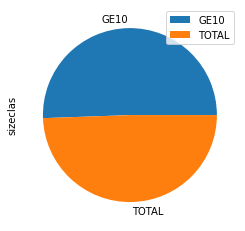

In [34]:
unique_sizeclas.to_frame().plot.pie(y = 'sizeclas')

In [35]:
# 6. What is the different units of currencies used to pay and their counts

In [36]:
currencies = data.groupby('unit')['unit'].count()

In [37]:
currencies

unit
EUR    3082
NAC    3082
PC     1530
PPS    3082
Name: unit, dtype: int64

<AxesSubplot:xlabel='unit'>

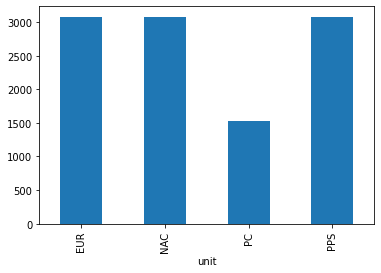

In [38]:
currencies.plot.bar()

In [39]:
# 7. Which country pays the maximum average salary and by how much.

In [40]:
max_avg = ratio_df.reset_index().iloc[0]
avg = max_avg.to_frame()
avg.columns = avg.iloc[0]
avg = avg.drop(avg.index[0])

In [41]:
difff = ratio_df.iloc[0:2].diff().iloc[1]
dif = difff.to_frame()
dif.columns = ['Diff',]

In [42]:
avg['diff'] = dif['Diff']*(-1)

In [43]:
avg

index,IS,diff
Female,4.32909e+06,1.842048e+06
Male,4.50027e+06,1.757111e+06
Tr,4.46676e+06,1.809822e+06
Average,4.43204e+06,1.802993e+06


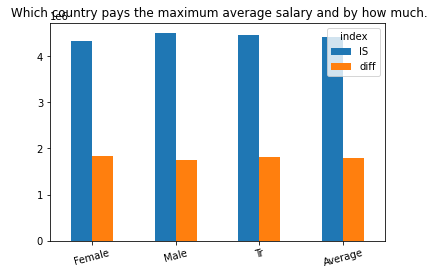

In [44]:
avg.plot.bar(rot=15, title=" Which country pays the maximum average salary and by how much.");

plt.show(block=True);